In [325]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [326]:
data = pd.read_csv('final.csv')
data.columns

Index(['GEOID', 'Year', 'RegionName', 'State', 'population', 'poverty.rate',
       'renter.occupied.households', 'pct.renter.occupied',
       'median.gross.rent', 'median.household.income', 'median.property.value',
       'rent.burden', 'pct.white', 'pct.af.am', 'pct.hispanic', 'pct.am.ind',
       'pct.asian', 'pct.nh.pi', 'pct.multiple', 'pct.other',
       'eviction.filings', 'evictions', 'eviction.rate',
       'eviction.filing.rate', 'low.flag', 'imputed', 'subbed', 'RegionID',
       'SizeRank', 'RegionType', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS',
       'ZHVI'],
      dtype='object')

In [327]:
data = pd.read_csv('final.csv')

selected_columns = [
    'poverty.rate', 'pct.renter.occupied', 'median.gross.rent',
    'rent.burden', 'median.household.income', 'eviction.rate', 'population', 'ZHVI'
]

data = data.dropna(subset=selected_columns)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[selected_columns])

pca = PCA(n_components=1)
socioeconomic_index = pca.fit_transform(scaled_data)

data['SEIFA'] = socioeconomic_index

data[['GEOID', 'Year', 'RegionName', 'State', 'SEIFA']]

,GEOID,Year,RegionName,State,SEIFA
0,2100,2016,Haines Borough,Alaska,1.188686
1,1001,2008,Autauga County,Alabama,1.511512
2,1001,2009,Autauga County,Alabama,1.399270
3,1001,2011,Autauga County,Alabama,2.049829
4,1001,2012,Autauga County,Alabama,2.153825
...,...,...,...,...,...
11683,56041,2016,Uinta County,Wyoming,1.104672
11684,56043,2013,Washakie County,Wyoming,0.305065
11685,56043,2014,Washakie County,Wyoming,0.344891
11686,56043,2015,Washakie County,Wyoming,0.374666


In [328]:
data.to_csv('final_with_SEIFA.csv', index=False)

In [329]:
data.to_csv('final_with_SEIFA_Label.csv', index=False)

In [330]:
data['Rank'] = data.groupby('Year')['SEIFA'].rank(ascending=False)

data = data.sort_values(['GEOID', 'Year']).reset_index(drop=True)

data['Rank_Change'] = data.groupby('GEOID')['Rank'].diff()

std_dev = data['Rank_Change'].std()
data['Rank_Change_SD'] = std_dev 

data['Classification'] = data['Rank_Change'].apply(
    lambda x: 'Gentrifying' if x > std_dev else 'Not Gentrifying'
)

In [331]:
data.to_csv(' .csv', index=False)

In [332]:
data

,GEOID,Year,RegionName,State,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,...,RegionType,Metro,StateCodeFIPS,MunicipalCodeFIPS,ZHVI,SEIFA,Rank,Rank_Change,Rank_Change_SD,Classification
0,1001,2008,Autauga County,Alabama,49584,7.52,4593,22.45,779.0,51463,...,county,"Montgomery, AL",1,1,1957993.489,1.511512,114.0,NaN,59.647871,Not Gentrifying
1,1001,2009,Autauga County,Alabama,49584,7.52,4783,22.45,779.0,51463,...,county,"Montgomery, AL",1,1,1908526.012,1.399270,131.0,17.0,59.647871,Not Gentrifying
2,1001,2011,Autauga County,Alabama,55221,9.28,5040,26.08,883.0,51281,...,county,"Montgomery, AL",1,1,1771719.315,2.049829,133.0,2.0,59.647871,Not Gentrifying
3,1001,2012,Autauga County,Alabama,55221,9.28,5107,26.08,883.0,51281,...,county,"Montgomery, AL",1,1,1779734.674,2.153825,122.0,-11.0,59.647871,Not Gentrifying
4,1001,2013,Autauga County,Alabama,55221,9.28,5174,26.08,883.0,51281,...,county,"Montgomery, AL",1,1,1823698.983,2.219181,111.0,-11.0,59.647871,Not Gentrifying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11677,56041,2016,Uinta County,Wyoming,20930,10.81,2195,26.95,641.0,56569,...,county,"Evanston, WY",56,41,2258164.400,1.104672,266.0,-8.0,59.647871,Not Gentrifying
11678,56043,2013,Washakie County,Wyoming,8400,10.08,974,26.25,605.0,47652,...,county,NaN,56,43,1821669.197,0.305065,432.0,NaN,59.647871,Not Gentrifying
11679,56043,2014,Washakie County,Wyoming,8400,10.08,988,26.25,605.0,47652,...,county,NaN,56,43,1837394.906,0.344891,428.0,-4.0,59.647871,Not Gentrifying
11680,56043,2015,Washakie County,Wyoming,8400,10.08,1002,26.25,605.0,47652,...,county,NaN,56,43,1905471.802,0.374666,435.0,7.0,59.647871,Not Gentrifying


In [333]:
data.Classification.value_counts()

Classification
Not Gentrifying    9956
Gentrifying        1726
Name: count, dtype: int64

In [334]:
# data.isnull().sum()
# data.dropna(inplace=True)
# data.isnull().sum()

In [335]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GEOID                       11682 non-null  int64  
 1   Year                        11682 non-null  int64  
 2   RegionName                  11682 non-null  object 
 3   State                       11682 non-null  object 
 4   population                  11682 non-null  int64  
 5   poverty.rate                11682 non-null  float64
 6   renter.occupied.households  11682 non-null  int64  
 7   pct.renter.occupied         11682 non-null  float64
 8   median.gross.rent           11682 non-null  float64
 9   median.household.income     11682 non-null  int64  
 10  median.property.value       11682 non-null  int64  
 11  rent.burden                 11682 non-null  float64
 12  pct.white                   11682 non-null  float64
 13  pct.af.am                   116

In [336]:
data.describe()

,GEOID,Year,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,median.property.value,rent.burden,...,subbed,RegionID,SizeRank,StateCodeFIPS,MunicipalCodeFIPS,ZHVI,SEIFA,Rank,Rank_Change,Rank_Change_SD
count,11682.000000,11682.000000,1.168200e+04,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,1.168200e+04,11682.000000,...,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,1.168200e+04,1.168200e+04,11682.000000,10148.000000,1.168200e+04
mean,31890.366632,2008.736860,8.581714e+04,11.905116,11573.209896,26.590812,572.445557,41973.158363,1.100817e+05,26.463508,...,0.055470,1574.436740,1799.376905,31.792330,98.036552,8.666217e+05,-1.946359e-17,355.911402,17.362239,5.964787e+01
std,15186.013708,4.645881,2.553870e+05,5.643165,40296.806692,6.646548,167.603663,10419.249552,5.968133e+04,4.875019,...,0.228905,899.963267,961.090382,15.176879,82.969428,1.026282e+06,1.786198e+00,214.355027,59.647871,1.492204e-12
min,1001.000000,2000.000000,4.330000e+02,0.000000,61.000000,7.350000,178.000000,15805.000000,2.250000e+04,8.300000,...,0.000000,67.000000,1.000000,1.000000,1.000000,0.000000e+00,-4.186121e+00,1.000000,-495.000000,5.964787e+01
25%,19175.000000,2005.000000,8.330750e+03,7.930000,800.250000,22.050000,459.000000,34680.000000,7.420000e+04,23.300000,...,0.000000,792.000000,963.000000,19.000000,37.000000,0.000000e+00,-1.212420e+00,172.000000,-9.000000,5.964787e+01
50%,32003.000000,2009.000000,1.801800e+04,10.930000,1797.000000,25.690000,564.000000,41135.000000,9.630000e+04,26.500000,...,0.000000,1569.000000,1975.000000,32.000000,81.000000,8.062850e+05,-2.410571e-01,345.000000,10.000000,5.964787e+01
75%,42099.000000,2013.000000,5.212500e+04,14.660000,5915.500000,29.920000,659.000000,48065.250000,1.325000e+05,29.600000,...,0.000000,2334.000000,2645.000000,42.000000,135.000000,1.475364e+06,9.537701e-01,532.000000,40.000000,5.964787e+01
max,56043.000000,2016.000000,5.257001e+06,45.380000,826101.000000,81.030000,1747.000000,112552.000000,1.000001e+06,50.100000,...,1.000000,3275.000000,3212.000000,56.000000,505.000000,1.433042e+07,1.079812e+01,822.000000,522.000000,5.964787e+01


In [337]:
# Validate Data Quality:

#Check for missing values, duplicates, or inconsistent formats in the final dataset
data.isnull().sum()

GEOID                            0
Year                             0
RegionName                       0
State                            0
population                       0
poverty.rate                     0
renter.occupied.households       0
pct.renter.occupied              0
median.gross.rent                0
median.household.income          0
median.property.value            0
rent.burden                      0
pct.white                        0
pct.af.am                        0
pct.hispanic                     0
pct.am.ind                       0
pct.asian                        0
pct.nh.pi                        0
pct.multiple                     0
pct.other                        0
eviction.filings                 0
evictions                        0
eviction.rate                    0
eviction.filing.rate             0
low.flag                         0
imputed                          0
subbed                           0
RegionID                         0
SizeRank            

In [338]:
data.duplicated().sum()

0

In [339]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GEOID                       11682 non-null  int64  
 1   Year                        11682 non-null  int64  
 2   RegionName                  11682 non-null  object 
 3   State                       11682 non-null  object 
 4   population                  11682 non-null  int64  
 5   poverty.rate                11682 non-null  float64
 6   renter.occupied.households  11682 non-null  int64  
 7   pct.renter.occupied         11682 non-null  float64
 8   median.gross.rent           11682 non-null  float64
 9   median.household.income     11682 non-null  int64  
 10  median.property.value       11682 non-null  int64  
 11  rent.burden                 11682 non-null  float64
 12  pct.white                   11682 non-null  float64
 13  pct.af.am                   116

In [340]:
data.describe()

,GEOID,Year,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,median.property.value,rent.burden,...,subbed,RegionID,SizeRank,StateCodeFIPS,MunicipalCodeFIPS,ZHVI,SEIFA,Rank,Rank_Change,Rank_Change_SD
count,11682.000000,11682.000000,1.168200e+04,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,1.168200e+04,11682.000000,...,11682.000000,11682.000000,11682.000000,11682.000000,11682.000000,1.168200e+04,1.168200e+04,11682.000000,10148.000000,1.168200e+04
mean,31890.366632,2008.736860,8.581714e+04,11.905116,11573.209896,26.590812,572.445557,41973.158363,1.100817e+05,26.463508,...,0.055470,1574.436740,1799.376905,31.792330,98.036552,8.666217e+05,-1.946359e-17,355.911402,17.362239,5.964787e+01
std,15186.013708,4.645881,2.553870e+05,5.643165,40296.806692,6.646548,167.603663,10419.249552,5.968133e+04,4.875019,...,0.228905,899.963267,961.090382,15.176879,82.969428,1.026282e+06,1.786198e+00,214.355027,59.647871,1.492204e-12
min,1001.000000,2000.000000,4.330000e+02,0.000000,61.000000,7.350000,178.000000,15805.000000,2.250000e+04,8.300000,...,0.000000,67.000000,1.000000,1.000000,1.000000,0.000000e+00,-4.186121e+00,1.000000,-495.000000,5.964787e+01
25%,19175.000000,2005.000000,8.330750e+03,7.930000,800.250000,22.050000,459.000000,34680.000000,7.420000e+04,23.300000,...,0.000000,792.000000,963.000000,19.000000,37.000000,0.000000e+00,-1.212420e+00,172.000000,-9.000000,5.964787e+01
50%,32003.000000,2009.000000,1.801800e+04,10.930000,1797.000000,25.690000,564.000000,41135.000000,9.630000e+04,26.500000,...,0.000000,1569.000000,1975.000000,32.000000,81.000000,8.062850e+05,-2.410571e-01,345.000000,10.000000,5.964787e+01
75%,42099.000000,2013.000000,5.212500e+04,14.660000,5915.500000,29.920000,659.000000,48065.250000,1.325000e+05,29.600000,...,0.000000,2334.000000,2645.000000,42.000000,135.000000,1.475364e+06,9.537701e-01,532.000000,40.000000,5.964787e+01
max,56043.000000,2016.000000,5.257001e+06,45.380000,826101.000000,81.030000,1747.000000,112552.000000,1.000001e+06,50.100000,...,1.000000,3275.000000,3212.000000,56.000000,505.000000,1.433042e+07,1.079812e+01,822.000000,522.000000,5.964787e+01


In [341]:
# Understand the dataset, identify patterns, and generate hypotheses for modeling.

# Understand Target Variable:
# Distribution of the target variable 'Classification'
data['Classification'].value_counts(normalize=True)

Classification
Not Gentrifying    0.852251
Gentrifying        0.147749
Name: proportion, dtype: float64

In [342]:
# Step 2: Feature Engineering

# Create new features or transform existing features to improve model performance
# Compute additional metrics such as: rent-to-income ratio, population density, etc.
data['rent_to_income_ratio'] = data['median.gross.rent'] / data['median.household.income']
data['population_density'] = data['population'] / data['ZHVI']

In [343]:
# Year-on-year change in ZHVI or SEIFA (growth rates).
data['ZHVI_growth_rate'] = data.groupby('RegionName')['ZHVI'].pct_change()

In [344]:
# Rolling averages for variables like eviction.rate.
data['eviction_rate_rolling_mean'] = data.groupby('GEOID')['eviction.rate'].rolling(window=3).mean().reset_index(0, drop=True)

In [345]:
# Encode Categorical Variables: Convert categorical features (e.g., State, RegionType) into numeric values using one-hot encoding or label encoding.

# One-Hot Encoding for State
data = pd.get_dummies(data, columns=['State'], drop_first=True)

# Label Encoding for RegionType
data['RegionType'] = data['RegionType'].astype('category').cat.codes


In [346]:
print(data.head())

# Print which fetures are correlated with the target variable
# correlation_with_target = data.corr()['Classification'].sort_values(ascending=False)

   GEOID  Year      RegionName  population  poverty.rate  \
0   1001  2008  Autauga County       49584          7.52   
1   1001  2009  Autauga County       49584          7.52   
2   1001  2011  Autauga County       55221          9.28   
3   1001  2012  Autauga County       55221          9.28   
4   1001  2013  Autauga County       55221          9.28   

   renter.occupied.households  pct.renter.occupied  median.gross.rent  \
0                        4593                22.45              779.0   
1                        4783                22.45              779.0   
2                        5040                26.08              883.0   
3                        5107                26.08              883.0   
4                        5174                26.08              883.0   

   median.household.income  median.property.value  ...  State_South Carolina  \
0                    51463                 130700  ...                 False   
1                    51463              

In [347]:


# Describe the data for numerical columns only
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Look for columns with high variance or large ranges
wide_range_columns = [col for col in numerical_data.columns if numerical_data[col].max() - numerical_data[col].min() > 1000]
print("Columns with wide ranges:", wide_range_columns)



Columns with wide ranges: ['GEOID', 'population', 'renter.occupied.households', 'median.gross.rent', 'median.household.income', 'median.property.value', 'eviction.filings', 'evictions', 'RegionID', 'SizeRank', 'ZHVI', 'Rank_Change', 'population_density', 'ZHVI_growth_rate']


In [348]:
# Ensure numeric features (e.g., poverty.rate, median.gross.rent) are scaled for consistent model performance.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['population', 'renter.occupied.households', 'median.gross.rent', 'median.household.income', 'median.property.value', 'eviction.filings', 'evictions', 'SizeRank', 'ZHVI']])

In [349]:
# total number of observations
print(data.shape[0])

#no of observations that has NaN values- only for Classification column

# Check for NaN values in the 'Classification' column
nan_count = data['Classification'].isna().sum()

# Print the result
print(f"Number of observations with NaN in 'Classification' column: {nan_count}")


11682
Number of observations with NaN in 'Classification' column: 0


In [350]:
# Perform PCA to reduce dimensionality and capture key components of the data.
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled) 


# Number of components to explain 95% of the variance
print("Number of components:", pca.n_components_)

# Create the DataFrame with PCA components and ensure 'Classification' is aligned correctly
data_preprocessed = pd.DataFrame(data_pca, columns=[f'PCA_{i+1}' for i in range(data_pca.shape[1])])

# Ensure that the 'Classification' column is properly added back to the new DataFrame
data_preprocessed['Classification'] = data['Classification'].values

# Check the first few rows to ensure the 'Classification' column is properly added
print(data_preprocessed.head())

# Total number of observations after PCA and adding 'Classification' column
print(data_preprocessed.shape[0])

# Check for NaN values in the 'Classification' column again
nan_count = data_preprocessed['Classification'].isna().sum()
print(f"Number of observations with NaN in 'Classification' column: {nan_count}")


Number of components: 5
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5   Classification
0  1.099153 -1.627957 -0.459562 -0.325100 -0.214130  Not Gentrifying
1  1.079875 -1.615587 -0.456490 -0.353342 -0.204877  Not Gentrifying
2  1.308467 -1.845036 -0.364742 -0.447167 -0.300320  Not Gentrifying
3  1.322290 -1.836551 -0.361544 -0.441592 -0.313219  Not Gentrifying
4  1.339846 -1.847566 -0.364608 -0.416475 -0.316159  Not Gentrifying
11682
Number of observations with NaN in 'Classification' column: 0


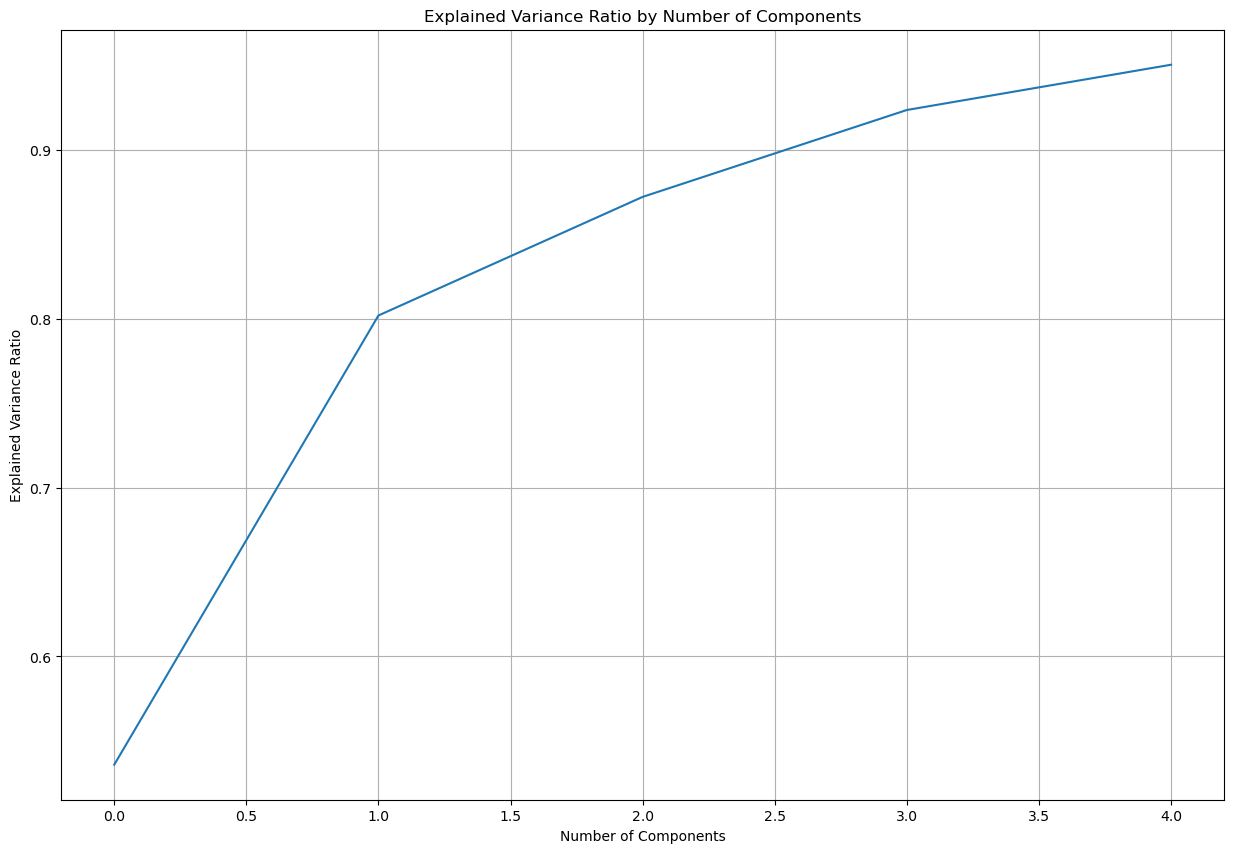

In [351]:
# Visualize the explained variance ratio of PCA components
plt.figure(figsize=(15, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid()
plt.show()


In [352]:
# Handle Class Imbalance: If Classification is imbalanced, use techniques like oversampling (SMOTE) or assign class weights in models.
data_preprocessed['Classification'].value_counts()


Classification
Not Gentrifying    9956
Gentrifying        1726
Name: count, dtype: int64

In [353]:

# Handle Class Imbalance: If Classification is imbalanced, use techniques like oversampling (SMOTE) or assign class weights in models.


# Separate features and target variable
X_resampled = data_preprocessed.drop('Classification', axis=1)
y_resampled = data_preprocessed['Classification']

# # Apply SMOTE to balance the classes
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Check the class distribution after resampling
# print(y_resampled.value_counts())


In [354]:
# Train Binary Classification Models :: Predict whether a region is "Gentrifying" or "Not Gentrifying".

# Split the data into training and testing sets



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X = data_preprocessed.drop('Classification', axis=1)
y = data_preprocessed['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [355]:
print(data.columns)

Index(['GEOID', 'Year', 'RegionName', 'population', 'poverty.rate',
       'renter.occupied.households', 'pct.renter.occupied',
       'median.gross.rent', 'median.household.income', 'median.property.value',
       'rent.burden', 'pct.white', 'pct.af.am', 'pct.hispanic', 'pct.am.ind',
       'pct.asian', 'pct.nh.pi', 'pct.multiple', 'pct.other',
       'eviction.filings', 'evictions', 'eviction.rate',
       'eviction.filing.rate', 'low.flag', 'imputed', 'subbed', 'RegionID',
       'SizeRank', 'RegionType', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS',
       'ZHVI', 'SEIFA', 'Rank', 'Rank_Change', 'Rank_Change_SD',
       'Classification', 'rent_to_income_ratio', 'population_density',
       'ZHVI_growth_rate', 'eviction_rate_rolling_mean', 'State_Alaska',
       'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_Florida', 'State_Georgia',
       'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas'

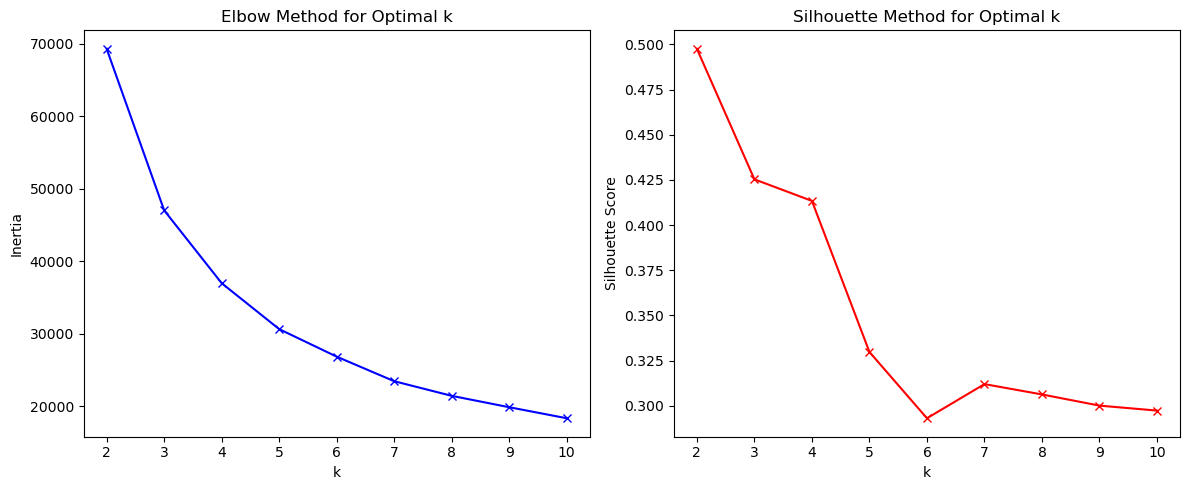

Optimal number of clusters: 2


In [356]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Prepare the data for clustering
X_cluster = X_resampled  # Use the resampled data from SMOTE

# Elbow Method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))

# Plot Elbow Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')

plt.tight_layout()
plt.show()

# Find the optimal k
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Perform K-means clustering with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(X_cluster)

# # Add cluster labels to the original dataframe
# data['Cluster'] = cluster_labels

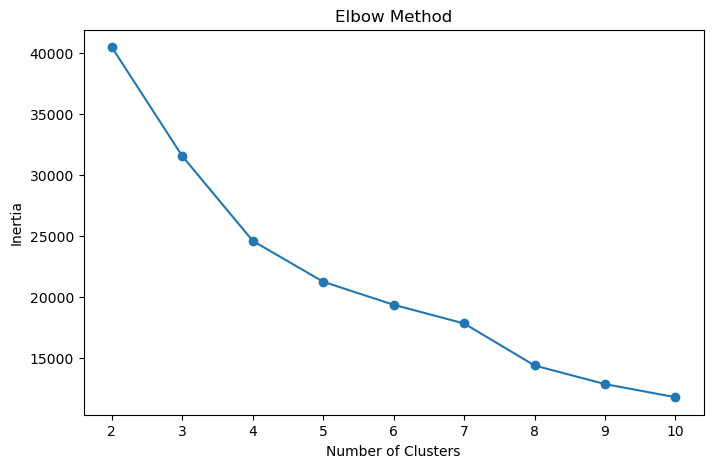

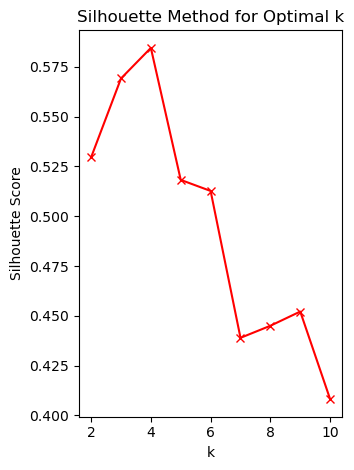

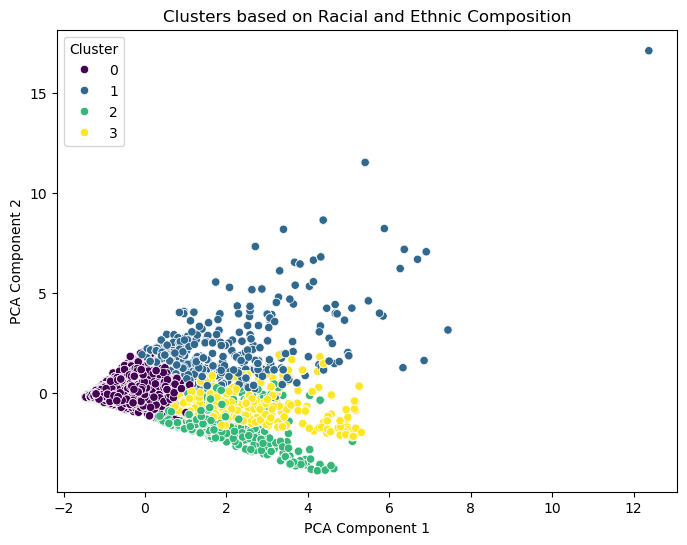

In [357]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select relevant features
features = ['pct.white', 'pct.af.am', 'pct.hispanic', 'pct.asian', 'pct.other']
data_selected = data[features]

# Step 2: Handle missing values (if any)
data_selected = data_selected.dropna()

# Step 3: Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Step 4: Determine optimal number of clusters
inertia = []
silhouette_scores_2=[]
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores_2.append(silhouette_score(data_scaled, kmeans.labels_))

# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores_2, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')

plt.tight_layout()
plt.show()

# Step 5: Apply KMeans with optimal clusters
optimal_k = 4  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Step 6: Add cluster labels to the dataset
data['Cluster'] = clusters

# Step 7: Visualize clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters based on Racial and Ethnic Composition')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

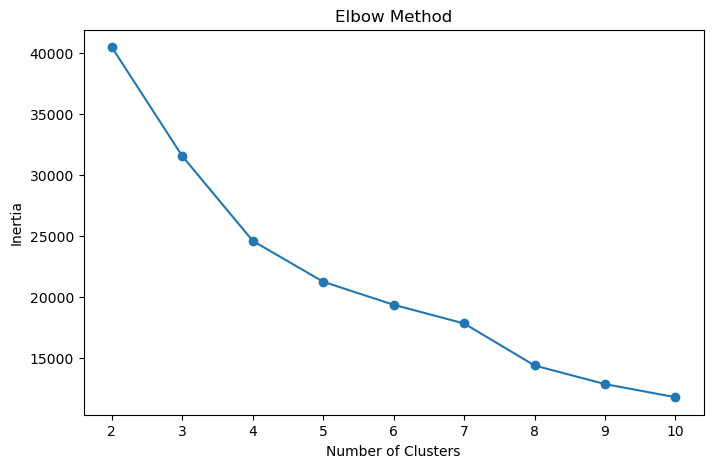

Cluster Summary:
         pct.white  pct.af.am  pct.hispanic  pct.asian  pct.other  \
Cluster                                                             
0        91.284328   2.237366      3.509240   0.506939   0.048367   
1        71.136227  11.232144     10.941361   3.864823   0.325959   
2        54.541144  37.642632      4.240000   0.620464   0.086008   
3        50.446947   2.296137     43.236791   0.547612   0.096791   

         poverty.rate  median.property.value     SEIFA  
Cluster                                                 
0           10.707071          107837.593955 -0.243922  
1           10.376624          175804.180064  2.827881  
2           17.776008           96295.920000  0.090716  
3           16.384849           84192.107996 -0.695418  


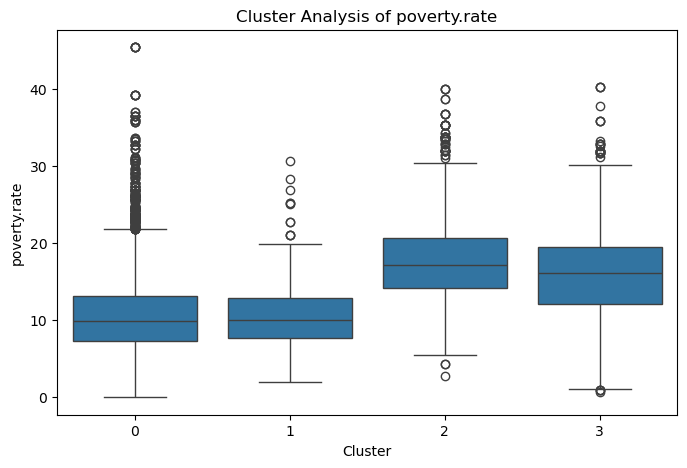

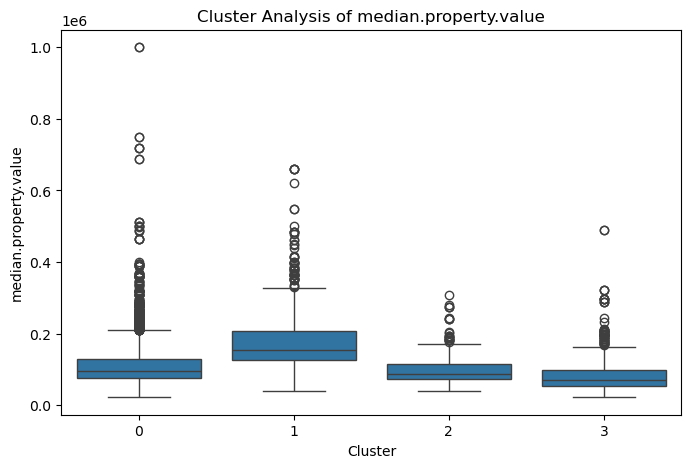

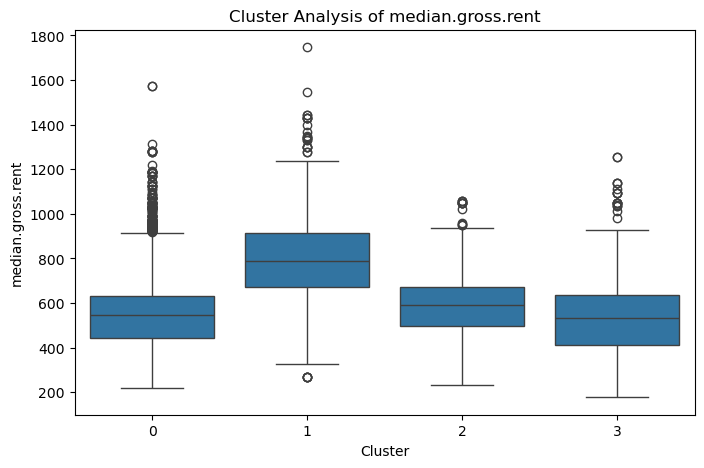

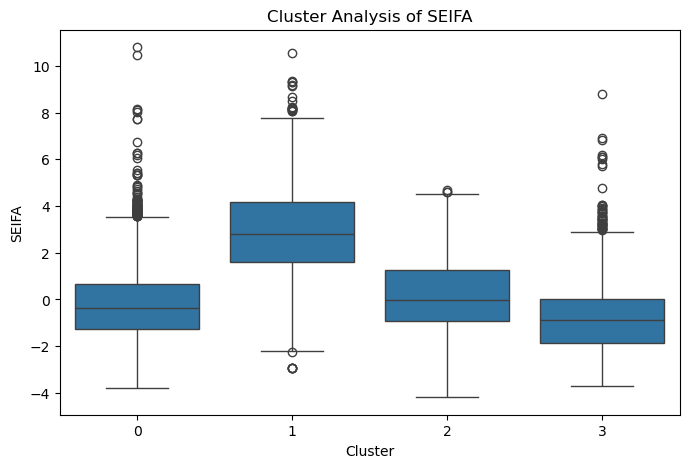

Gentrifying counties per cluster:
Cluster
0    1290
3     228
2     182
1      26
Name: count, dtype: int64
Cluster 0: 1290/8536 counties are gentrifying
Cluster 2: 182/1250 counties are gentrifying
Cluster 1: 26/933 counties are gentrifying
Cluster 3: 228/963 counties are gentrifying


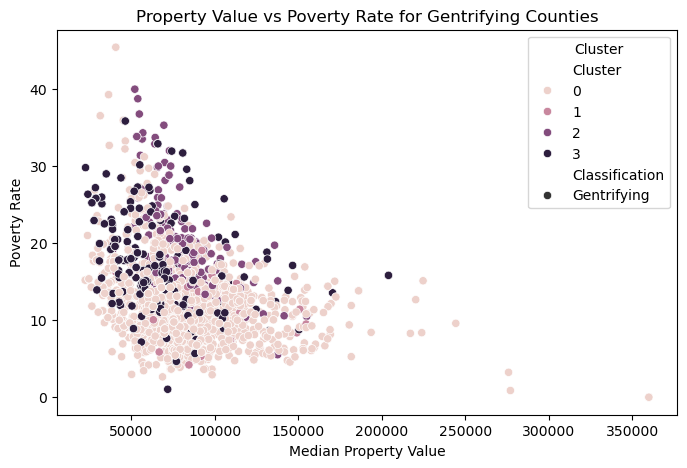

In [358]:
# Step 1: Feature Selection
features = ['pct.white', 'pct.af.am', 'pct.hispanic', 'pct.asian', 'pct.other']
selected_data = data[features]

# Step 2: Handle Missing Values
selected_data = selected_data.dropna()

# Step 3: Scale the Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(selected_data)

# Step 4: Determine Optimal Number of Clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 5: Apply KMeans with Optimal Clusters
optimal_k = 4  # Replace with the chosen number of clusters from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Step 6: Perform Cluster Analysis
cluster_summary = data.groupby('Cluster')[features + ['poverty.rate', 'median.property.value', 'SEIFA']].mean()
print("Cluster Summary:")
print(cluster_summary)

# Visualize cluster distribution
for feature in ['poverty.rate', 'median.property.value', 'median.gross.rent', 'SEIFA']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'Cluster Analysis of {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# Step 7: Analyze Gentrifying Counties
# If Classification column exists, filter by 'Gentrifying'
if 'Classification' in data.columns:
    gentrifying = data[data['Classification'] == 'Gentrifying']

    # Analyze gentrifying counties across clusters
    gentrifying_clusters = gentrifying['Cluster'].value_counts()
    print("Gentrifying counties per cluster:")
    print(gentrifying_clusters)

    # Compare gentrifying vs non-gentrifying in each cluster
    for cluster in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster]
        gentrifying_count = cluster_data[cluster_data['Classification'] == 'Gentrifying'].shape[0]
        total_count = cluster_data.shape[0]
        print(f"Cluster {cluster}: {gentrifying_count}/{total_count} counties are gentrifying")

    # Visualize gentrifying counties
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x='median.property.value', y='poverty.rate', 
        hue='Cluster', style=gentrifying['Classification'], data=gentrifying
    )
    plt.title('Property Value vs Poverty Rate for Gentrifying Counties')
    plt.xlabel('Median Property Value')
    plt.ylabel('Poverty Rate')
    plt.legend(title='Cluster')
    plt.show()

# Step 8: (Optional) Spatial Visualization
# Replace with actual latitude and longitude columns if available
if 'latitude' in data.columns and 'longitude' in data.columns:
    import folium

    map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Center on US
    for _, row in data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color='blue' if row['Classification'] == 'Gentrifying' else 'red',
            fill=True,
            fill_opacity=0.6,
        ).add_to(map)
    map.save("gentrification_clusters.html")
    print("Map saved as 'gentrification_clusters.html'")

In [359]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import numpy as np
# import pandas as pd

# # Selecting columns for clustering
# X = data[['poverty.rate', 'pct.renter.occupied', 'median.gross.rent',
#           'rent.burden', 'median.household.income', 'eviction.rate', 'population', 'ZHVI',
#           'rent_to_income_ratio', 'population_density', 'ZHVI_growth_rate', 'eviction_rate_rolling_mean']]

# # Replace infinite values with NaN
# X_cluster = X.replace([np.inf, -np.inf], np.nan)

# # Remove rows with NaN values and keep track of valid indices
# X_cluster = X_cluster.dropna()
# valid_indices = X_cluster.index

# # Data standardization
# sc = StandardScaler()
# X_sc = sc.fit_transform(X_cluster)

# # Apply KMeans clustering
# km = KMeans(n_clusters=3, random_state=42)
# labels = km.fit_predict(X_sc)

# # Create a new column 'cluster' in the original dataframe and initialize with NaN
# data['cluster'] = np.nan

# # Assign cluster labels only to the rows that were used in clustering
# data.loc[valid_indices, 'cluster'] = labels

# # If you want to remove rows without cluster assignments
# data_clustered = data.dropna(subset=['cluster'])


In [360]:
# for col in data[['rent.burden', 'poverty.rate', 'rent_to_income_ratio', 'median.household.income']].columns:
#     sns.histplot(data=data,
#                  x=col,
#                  hue='cluster',
#                  palette='viridis')
#     plt.xticks(rotation=90, ha='right')
#     plt.title(f'{col.capitalize().replace("_", " ")}', fontsize=25)
#     plt.show()

In [361]:
# data.columns
# for cluster in range(3):
#     i = 1
#     print(f'Regions in cluster {cluster}:')
#     unique_regions = data.query(f'cluster == {cluster}')['RegionName'].unique()
#     for elem in unique_regions:
#         print(f'{i}. {elem}')
#         i += 1
#     print(25*'_', '\n')

In [362]:
# i = 1
# not_0 = set(data.query('cluster != 0')['RegionName'].to_list())
# is_0 = set(data.query('cluster == 0')['RegionName'].to_list())
# in_0_and_1_or_2 = set(not_0).intersection(is_0)
# print('Regions in cluster 0 that are listed for another cluster:')
# for elem in in_0_and_1_or_2:
#     print(f'{i}. {elem}')
#     i += 1

In [363]:
# # Prepare data for clustering
# features_for_clustering = [
#     'poverty.rate', 'pct.renter.occupied', 'median.gross.rent',
#     'rent.burden', 'median.household.income', 'eviction.rate', 'population', 'ZHVI',
#     'rent_to_income_ratio', 'population_density', 'ZHVI_growth_rate', 'eviction_rate_rolling_mean'
# ]

# # Filter only gentrifying neighborhoods
# gentrifying_data = data[data['Classification'] == 'Gentrifying']

# # Prepare the features for clustering
# X_cluster = gentrifying_data[features_for_clustering]

# # Replace infinite values with NaN
# X_cluster = X_cluster.replace([np.inf, -np.inf], np.nan)

# # Remove rows with NaN values
# X_cluster = X_cluster.dropna()

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_cluster)

# # Determine optimal number of clusters using silhouette score
# silhouette_scores = []
# K = range(2, 11)
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X_scaled)
#     silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# # Plot silhouette scores
# plt.figure(figsize=(10, 6))
# plt.plot(K, silhouette_scores, 'bx-')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score vs. Number of Clusters')
# plt.show()

# # Choose the number of clusters based on the elbow in the silhouette score plot
# optimal_k = 3  # Adjust this based on the plot

# # Perform K-means clustering
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# cluster_labels = kmeans.fit_predict(X_scaled)

# # Add cluster labels to the dataframe
# X_cluster['Cluster'] = cluster_labels

# # Analyze cluster characteristics
# for i in range(optimal_k):
#     cluster_data = X_cluster[X_cluster['Cluster'] == i]
#     print(f"\nCluster {i} Characteristics:")
#     print(cluster_data[features_for_clustering].mean())

# # Visualize clusters (example using two features)
# plt.figure(figsize=(12, 8))
# scatter = plt.scatter(X_cluster['median.household.income'], 
#                       X_cluster['ZHVI'], 
#                       c=X_cluster['Cluster'], 
#                       cmap='viridis')
# plt.xlabel('Median Household Income')
# plt.ylabel('ZHVI (Zillow Home Value Index)')
# plt.title('Clusters of Gentrifying Neighborhoods')
# plt.colorbar(scatter)
# plt.show()

In [364]:
# # Assuming 'data' is your original DataFrame and 'State' is a column in it

# # Prepare data for clustering
# features_for_clustering = [
#     'poverty.rate', 'pct.renter.occupied', 'median.gross.rent',
#     'rent.burden', 'median.household.income', 'eviction.rate', 'population', 'ZHVI',
#     'rent_to_income_ratio', 'population_density', 'ZHVI_growth_rate', 'eviction_rate_rolling_mean'
# ]

# # Filter only gentrifying neighborhoods
# gentrifying_data = data[data['Classification'] == 'Gentrifying']

# # Prepare the features for clustering
# X_cluster = gentrifying_data[features_for_clustering + ['RegionName']]

# # Replace infinite values with NaN and remove rows with NaN values
# X_cluster = X_cluster.replace([np.inf, -np.inf], np.nan).dropna()

# # Scale the features (excluding 'State')
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_cluster[features_for_clustering])

# # Perform K-means clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# cluster_labels = kmeans.fit_predict(X_scaled)

# # Add cluster labels to the dataframe
# X_cluster['Cluster'] = cluster_labels

# # Analyze cluster characteristics and states
# for i in range(3):
#     cluster_data = X_cluster[X_cluster['Cluster'] == i]
#     print(f"\nCluster {i} Characteristics:")
#     print(cluster_data[features_for_clustering].mean())
    
#     print(f"\nStates in Cluster {i}:")
#     state_counts = cluster_data['RegionName'].value_counts()
#     for state, count in state_counts.items():
#         print(f"{state}: {count}")

# # Visualize state distribution across clusters
# state_cluster_counts = X_cluster.groupby(['RegionName', 'Cluster']).size().unstack(fill_value=0)
# state_cluster_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
# plt.title('Distribution of RegionName across Clusters')
# plt.xlabel('RegionName')
# plt.ylabel('Number of Neighborhoods')
# plt.legend(title='Cluster')
# plt.xticks(rotation=90, ha='right')
# plt.tight_layout()
# plt.show()


In [365]:
# # Group the data by RegionName and Cluster, and count the occurrences
# region_cluster_counts = X_cluster.groupby(['RegionName', 'Cluster']).size().unstack(fill_value=0)

# # Calculate the total count for each RegionName and sort
# region_total_counts = region_cluster_counts.sum(axis=1)
# region_cluster_counts = region_cluster_counts.loc[region_total_counts.sort_values(ascending=False).index]

# # Select top 30 RegionNames for better visibility
# top_30_regions = region_cluster_counts.head(30)

# # Create a figure with two subplots
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20), gridspec_kw={'height_ratios': [3, 1]})

# # Heatmap
# sns.heatmap(top_30_regions, cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'Number of Neighborhoods'})
# ax1.set_title('Distribution of Top 30 RegionNames across Clusters', fontsize=16)
# ax1.set_xlabel('')
# ax1.set_ylabel('RegionName', fontsize=12)

# # Calculate the percentage of each cluster for each RegionName
# cluster_percentages = top_30_regions.div(top_30_regions.sum(axis=1), axis=0)

# # Scatter plot
# for i, region in enumerate(top_30_regions.index):
#     ax2.scatter([0, 1, 2], cluster_percentages.loc[region], s=100*top_30_regions.loc[region], alpha=0.6, label=region)

# ax2.set_xlim(-0.5, 2.5)
# ax2.set_ylim(0, 1)
# ax2.set_xticks([0, 1, 2])
# ax2.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])
# ax2.set_ylabel('Percentage of Neighborhoods', fontsize=12)
# ax2.set_title('Cluster Distribution for Top 30 RegionNames', fontsize=16)

# plt.tight_layout()
# plt.show()